
--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1083
           1       0.20      0.50      0.29         6

    accuracy                           0.99      1089
   macro avg       0.60      0.74      0.64      1089
weighted avg       0.99      0.99      0.99      1089



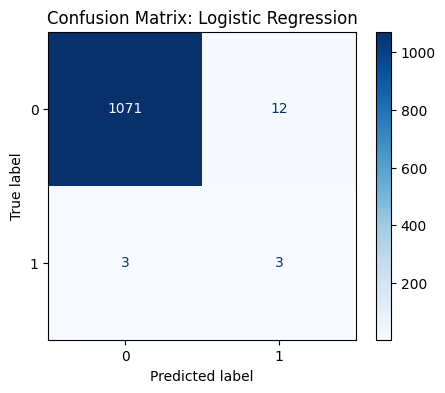


--- Shallow Decision Tree Results ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1083
           1       0.20      0.50      0.29         6

    accuracy                           0.99      1089
   macro avg       0.60      0.74      0.64      1089
weighted avg       0.99      0.99      0.99      1089



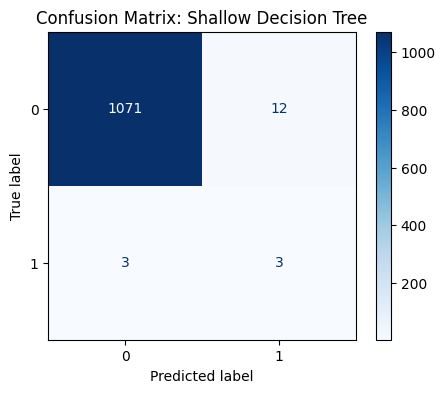


--- Baseline Benchmarks ---
                   Model  Accuracy  Recall
0    Logistic Regression  0.986226     0.5
1  Shallow Decision Tree  0.986226     0.5


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# 1. LOAD PREPARED DATA
X_train = pd.read_csv('X_train_final.csv')
y_train = pd.read_csv('y_train_final.csv').values.ravel()
X_test = pd.read_csv('X_test_final.csv')
# Binarizing the test target to match our classification baseline (Threshold: 0.7)
y_test_cont = pd.read_csv('y_test_final.csv').values.ravel()
y_test = (y_test_cont > 0.7).astype(int)

# 2. INITIALIZE BASELINE PIPELINES
# Pipeline 1: Logistic Regression
log_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

# Pipeline 2: Shallow Decision Tree
# max_depth=3 ensures the model stays a 'baseline' and doesn't overfit early
tree_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(max_depth=3, random_state=42))
])

# 3. TRAIN AND EVALUATE
baselines = {
    "Logistic Regression": log_reg_pipe,
    "Shallow Decision Tree": tree_pipe
}

results = []

for name, pipe in baselines.items():
    # Training [cite: 60]
    pipe.fit(X_train, y_train)
    
    # Predicting
    y_pred = pipe.predict(X_test)
    
    # Storing Metrics [cite: 69]
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "Recall": rec})
    
    # Mandatory Outputs: Confusion Matrix and Classification Report [cite: 71, 72]
    print(f"\n--- {name} Results ---")
    print(classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots(figsize=(5, 4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# 4. BASELINE SUMMARY TABLE
baseline_df = pd.DataFrame(results)
print("\n--- Baseline Benchmarks ---")
print(baseline_df)